<a href="https://colab.research.google.com/github/he16946/Data_Labs/blob/master/BlackJack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Jack Data

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.environ['KAGGLE_USERNAME'] = "ce889group3" # username from the json file

os.environ['KAGGLE_KEY'] = "2fec783dbd857229b51562347fd33dfe" # key from the json file

! kaggle datasets download -d mojocolors/900000-hands-of-blackjack-results
! unzip -q "900000-hands-of-blackjack-results.zip"

 70% 5.00M/7.14M [00:00<00:00, 32.3MB/s]
100% 7.14M/7.14M [00:00<00:00, 34.1MB/s]


In [0]:
df = pd.read_csv("blkjckhands.csv")

In [4]:
df.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,0,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


In [5]:
df.columns

Index(['Unnamed: 0', 'PlayerNo', 'card1', 'card2', 'card3', 'card4', 'card5',
       'sumofcards', 'dealcard1', 'dealcard2', 'dealcard3', 'dealcard4',
       'dealcard5', 'sumofdeal', 'blkjck', 'winloss', 'plybustbeat',
       'dlbustbeat', 'plwinamt', 'dlwinamt', 'ply2cardsum'],
      dtype='object')

## Find imbalance of dataset

In [6]:
df['blkjck'] = df['blkjck'].replace({'blkjck': {'Win': 1, 'nowin': 0}})
df['blkjck'].value_counts()

nowin    856939
Win       43061
Name: blkjck, dtype: int64

In [7]:
print('Black Jack', round(df['blkjck'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('No Black Jack', round(df['blkjck'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Black Jack 4.78 % of the dataset
No Black Jack 95.22 % of the dataset


(array([856939.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  43061.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

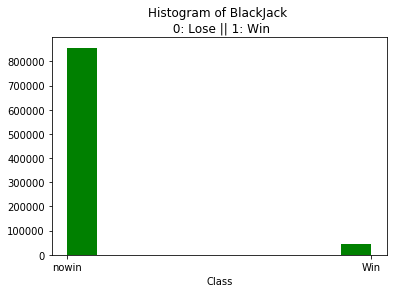

In [8]:
plt.title('Histogram of BlackJack \n 0: Lose || 1: Win')
plt.xlabel('Class')
plt.hist(df['blkjck'], color=['green'])